Kassandra's first 20 participants - data cleaning & a bit of exploratory analysis

1. Import the data and and create a more readable csv file. 

In [2]:
#Import packages and set path 
import pandas as pd 
import glob 
import matplotlib.pyplot as plt
path = "/Users/kassandrafuiten/"

#Combine all participant task performance csvs in to single data frame 
combined_data = pd.DataFrame()
csv_files = glob.glob(path + "task_performance_csv" + "/*.csv")
for file in csv_files:
    df = pd.read_csv(file)
    combined_data = pd.concat([combined_data, df])
combined_data = combined_data.drop(['Unnamed: 0'], axis=1) #delete junk column 
combined_data.dropna(subset=['name'], inplace=True) #delete extra rows at the end of CSVs 
combined_data = combined_data[~combined_data.apply(lambda x: x.astype(str).str.contains('training').any(), axis=1)] #delete training trials 
combined_data['name'] = combined_data['name'].astype(int) 
combined_data['block_settings'] = combined_data['block_settings'].astype(int) 
combined_data['block_num'] = combined_data['block_num'].astype(int) 

#Add columns that indicate if participants letter or equation answers were correct
letters_true = combined_data['pres_letter'] == combined_data['answ_letter']
combined_data['letters_correct'] = letters_true 
equations_true = combined_data['eq_truthvalue'] == combined_data['truth_given']
combined_data['equations_correct'] = equations_true
combined_data['letters_correct'] = combined_data['letters_correct'].astype(int) 
combined_data['equations_correct'] = combined_data['equations_correct'].astype(int)

#Save cleaned csv 
combined_data.to_csv(path +"first_participants_performance"+".csv")

#Check dataframe 
print(combined_data.head())

    name random  block_num  block_exp_time  block_load  block_settings  \
16    18  False          0        416841.0         5.0              30   
17    18  False          0        416841.0         5.0              30   
18    18  False          0        416841.0         5.0              30   
19    18  False          0        416841.0         5.0              30   
20    18  False          0        416841.0         5.0              30   

    trial_num  trial_exp_time pres_letter  letter_pres_exp_time  ...  \
16        1.0        417136.0           Z              417161.0  ...   
17        1.0        424201.0           L              424244.0  ...   
18        1.0        431281.0           H              431311.0  ...   
19        1.0        438343.0           B              438394.0  ...   
20        1.0        445435.0           N              445461.0  ...   

   letter_answ_exp_time  letter_react_time  letter_memory_time  pres_eq  \
16             454149.0             1621.0     

2. Calculate each participants' overall letter and equation score. 

In [3]:
#Create dictionary 
by_participant = combined_data.groupby('name')
participant_dfs = {}
for i, name in by_participant: 
    participant_dfs[i] = name

#Determine letter scores for each participant 
participant_rows = combined_data['name'].value_counts()[1] #determine how many rows per participant 
let_percentage_correct = []
for name in participant_dfs: 
    let_correct = participant_dfs[name]["letters_correct"].value_counts()[1]
    lper_correct = let_correct / participant_rows 
    let_percentage_correct.append(lper_correct)

#Determine equation scores for each participant 
eq_percentage_correct = []
for name in participant_dfs: 
    eq_correct = participant_dfs[name]["equations_correct"].value_counts()[1]
    eper_correct = eq_correct / participant_rows 
    eq_percentage_correct.append(eper_correct)

3. Graph scores by participant. 

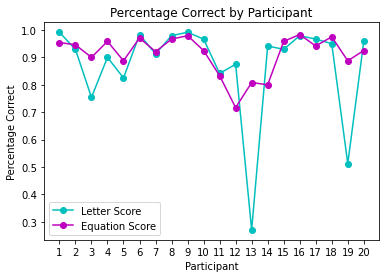

In [4]:
plt.plot(let_percentage_correct, label="Letter Score", marker='o', linestyle='-', color='c')
plt.plot(eq_percentage_correct, label="Equation Score", marker='o', linestyle='-', color='m')
plt.xlabel("Participant")
plt.ylabel("Percentage Correct")
plt.title("Percentage Correct by Participant")
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
x_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
plt.xticks(ticks = x_ticks, labels = x_labels)
plt.legend()
plt.show()

We can see that, in general, participants score about the same on both letters and equations and that, overall, the scores are quite good. Participants 13 and 19 stand out as outliers: these participants seemed to have struggled a lot with the letter task. 

4. Determine overall mean percentage correct for letters and equations. 

In [5]:
mean_let_score = sum(let_percentage_correct)/len(let_percentage_correct)
print('mean letter score (with outliers): ' + str(round(mean_let_score, 3)))
mean_eq_score = sum(eq_percentage_correct)/len(eq_percentage_correct)
print('mean equation score: ' + str(round(mean_eq_score, 3)))

mean letter score (with outliers): 0.873
mean equation score: 0.912


5. Determine if participant performance differs on long vs. short trials. 

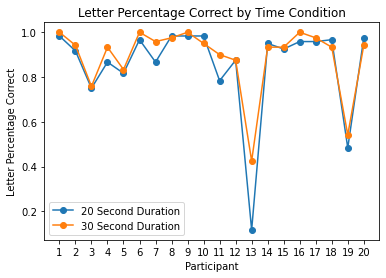

In [6]:
#Seperate out short time conditions 
short_time = 20 
short_time_dfs = {} #create new dictionary with only short time conditions 
for name in participant_dfs.keys():
    short_time_dfs[name] = participant_dfs[name][participant_dfs[name]["block_settings"] == short_time]
short_time_dfs[1].to_csv(path +"short_time_participants"+".csv")

#Calculate percentages correct for short time conditions 
st_rows = 120 
st_let_percentage_correct = []
for name in short_time_dfs: 
    st_let_correct = short_time_dfs[name]["letters_correct"].value_counts()[1]
    st_lper_correct = st_let_correct / 120
    st_let_percentage_correct.append(st_lper_correct)

#Seperate out long time conditions 
long_time = 30 
long_time_dfs = {} #create new dictionary with only long time conditions 
for name in participant_dfs.keys():
    long_time_dfs[name] = participant_dfs[name][participant_dfs[name]["block_settings"] == long_time]
long_time_dfs[1].to_csv(path +"short_time_participants"+".csv")

#Calculate percentages correct for short time conditions 
lt_let_percentage_correct = []
for name in long_time_dfs: 
    lt_let_correct = long_time_dfs[name]["letters_correct"].value_counts()[1]
    lt_lper_correct = lt_let_correct / 120
    lt_let_percentage_correct.append(lt_lper_correct)

#Graph short versus long time duration letter score 
plt.plot(st_let_percentage_correct, label="20 Second Duration", marker='o', linestyle='-')
plt.plot(lt_let_percentage_correct, label="30 Second Duration", marker='o', linestyle='-')
plt.xlabel("Participant")
plt.ylabel("Letter Percentage Correct")
plt.title("Letter Percentage Correct by Time Condition")
plt.xticks(ticks = x_ticks, labels = x_labels)
plt.legend()
plt.show()

It seems that participants tend to do slightly better on the long duration trials. 

6. Import thought probe csv files and combine them into a single, cleaned csv file (to be explored using R). 

In [14]:
#Create probe dataframe 
probe_df = pd.DataFrame()
csv_files = glob.glob(path + "thought_probe_csv" + "/*.csv")
for file in csv_files:
    df = pd.read_csv(file)
    probe_df = pd.concat([probe_df, df])
probe_df['probe1_answ'].fillna(0, inplace=True)
probe_df['probe1_answ'] = probe_df['probe1_answ'].astype(int)
probe_df['probe2_answ'].fillna(0, inplace=True)
probe_df = probe_df[~probe_df.apply(lambda x: x.astype(str).str.contains('training').any(), axis=1)]

#Create probe dictionary 
probe_participant = probe_df.groupby('name')
probe_dict = {}
for i, name in probe_participant: 
    probe_dict[i] = name

#Create lists with probe answers 
probe_1 = []
probe_2 = []
for i, name in probe_dict.items(): 
    probe1_answ = name['probe1_answ'].tolist()
    probe2_answ = name['probe2_answ'].tolist()
    probe_1.extend(probe1_answ)
    probe_2.extend(probe2_answ)

#Create list with all participants' mean scores 
all_scores_mean = []
for i, name in participant_dfs.items(): 
    scores_mean = name.groupby(['block_num', 'trial_num'])['letters_correct'].mean()
    scores_mean = scores_mean.to_list()
    all_scores_mean.extend(scores_mean)

#Create list for time conditions by trial 
time_condition = []
for i, name in participant_dfs.items(): 
    time = name.groupby(['block_num', 'trial_num'])['block_settings'].mean()
    time = time.to_list()
    time_condition.extend(time)

#Create list for participants' names
participant = []
for i, name in participant_dfs.items(): 
    p_name = name.groupby(['block_num', 'trial_num'])['name'].mean()
    p_name  = p_name.to_list()
    participant.extend(p_name)

#Create dataframe only for trials where thought probes were present 
mean_probe = list(zip(participant, time_condition, all_scores_mean, probe_1, probe_2))
mean_probe_df = pd.DataFrame(mean_probe, columns=["participant", "time_condition", "trial_score", "probe1", "probe2"])
mean_probe_df = mean_probe_df[mean_probe_df["probe1"] != 0] 

#Save csv
mean_probe_df.to_csv(path +"first_participants_probes"+".csv")

#Check data frame 
print(mean_probe_df.head())

    participant  time_condition  trial_score  probe1  probe2
3           1.0            30.0          1.0       6  ['B1']
4           1.0            20.0          1.0       6  ['B1']
5           1.0            20.0          1.0       6  ['B1']
10          1.0            30.0          1.0       6  ['B1']
11          1.0            30.0          1.0       6  ['B1']
